In [ ]:
'''
Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 
Dataset:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, 
and second column represent exchange rates USD to Australian Dollar.
Part 1: Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.
Part 2: Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time
series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.
Part 3: Model Building - Exponential Smoothing
1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or 
Holt-Winters).
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the 
actual data.
Part 4: Evaluation and Comparison
1. Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2. Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3. Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.
Deliverables:
•	Include visualizations and explanations for the choices and findings at each step.
•	Well-commented Python code that used to conduct the analysis and build the models.
Assessment Criteria:
•	Accuracy and completeness of the data preparation and exploration steps.
•	Justification for model selection and parameter tuning decisions.
•	Clarity and depth of the analysis in the diagnostics and model evaluation stages.
This assignment offers a hands-on experience with real-world data, applying sophisticated time series forecasting methods to predict future currency 
exchange rates.
'''

In [1]:
#Load the dataset
import pandas as pd
df = pd.read_csv("C:\\Users\\sujey\\Downloads\\Assignments\\Timeseries\\Timeseries\\exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [2]:
# Parse the date column with the correct format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

# Display the first few rows of the DataFrame to verify
display(df.head())

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


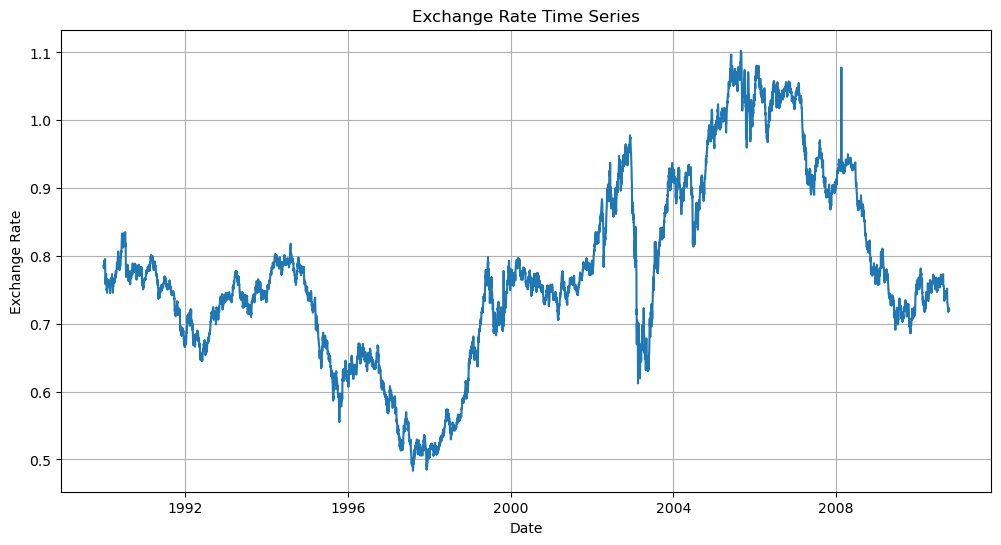

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the date column as the index for plotting
df.set_index('date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='Ex_rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

In [4]:
#Checking for missing values
df.isnull().sum()

Ex_rate    0
dtype: int64

In [ ]:
'''
Part 2: Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time
series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.
'''

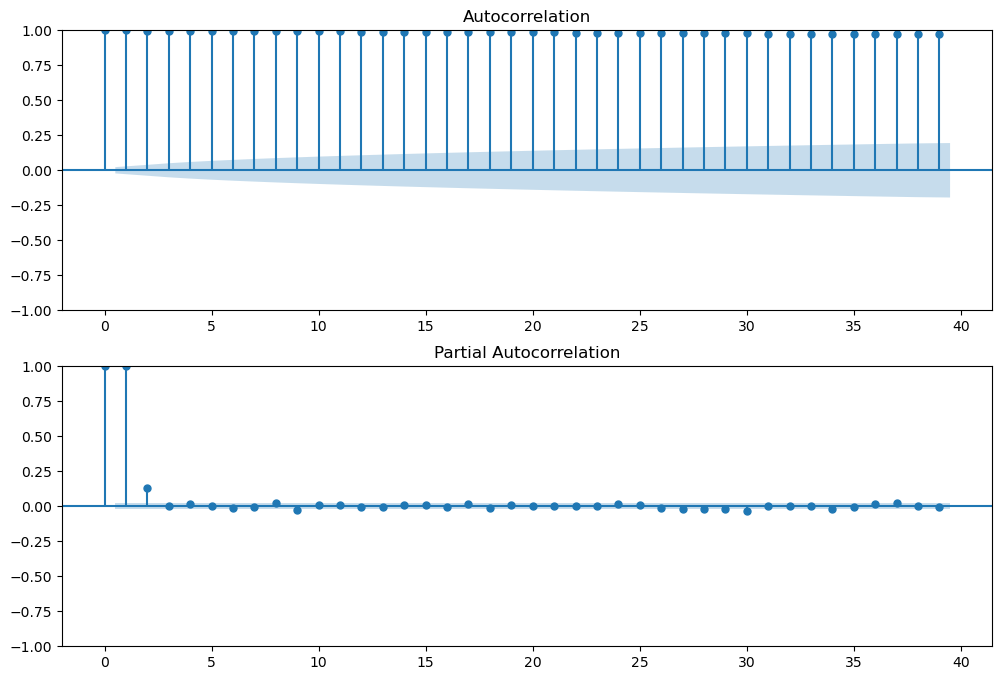

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Create ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df['Ex_rate'], ax=axes[0])
plot_pacf(df['Ex_rate'], ax=axes[1])

plt.show()

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model using the parameters (1, 1, 0) based on the PACF and initial interpretation
p, d, q = 1, 1, 0
model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


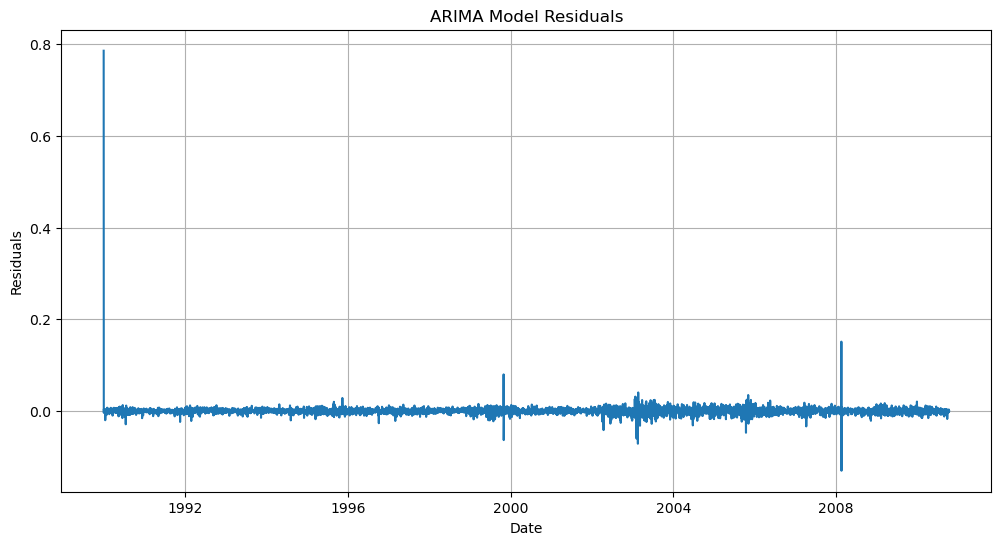

<Figure size 1200x600 with 0 Axes>

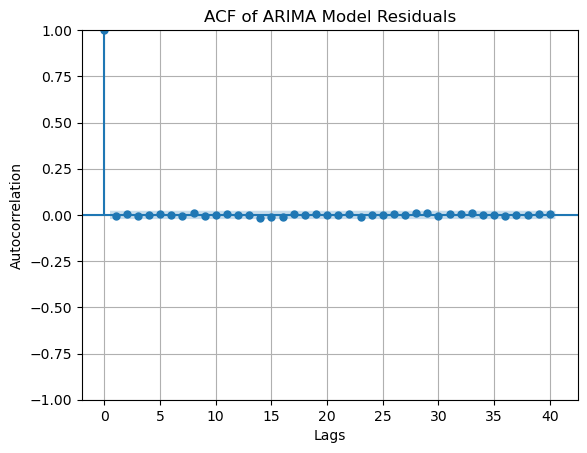

In [7]:
#Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Get the residuals from the fitted ARIMA model
residuals = arima_result.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot the ACF of the residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40) # You can adjust the number of lags
plt.title('ACF of ARIMA Model Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


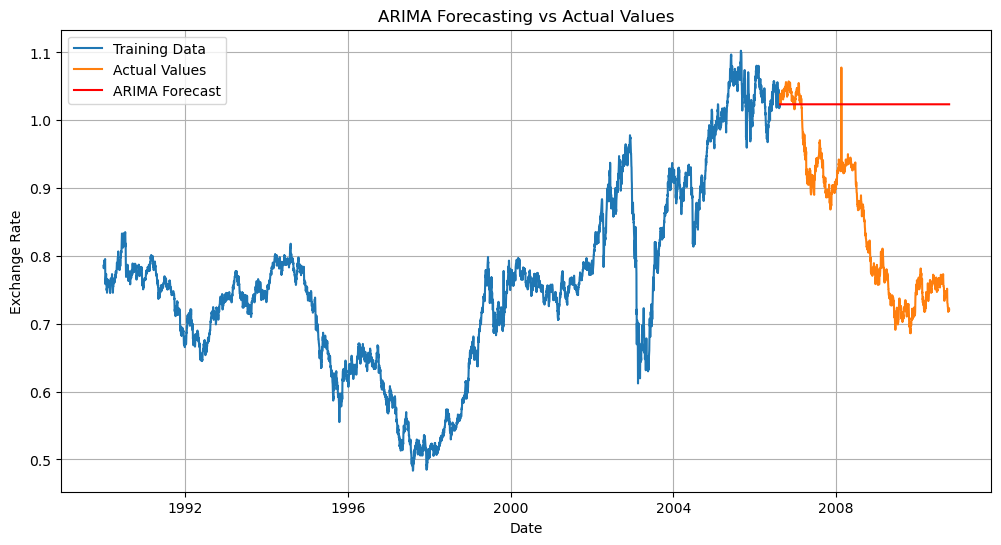

In [8]:
# Perform out-of-sample forecasting and visualize the predicted values against the actual values.
import matplotlib.pyplot as plt

# Split data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(df) * 0.8)
train_data, test_data = df[0:train_size], df[train_size:]

# Refit the ARIMA model on the training data
# Using the parameters (1, 1, 0)
p, d, q = 1, 1, 0
model = ARIMA(train_data['Ex_rate'], order=(p, d, q))
arima_result_train = model.fit()

# Make out-of-sample predictions
start_index = len(train_data)
end_index = len(df) - 1
predictions = arima_result_train.predict(start=start_index, end=end_index)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['Ex_rate'], label='Training Data')
plt.plot(test_data['Ex_rate'], label='Actual Values')
plt.plot(predictions, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecasting vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''
Part 3: Model Building - Exponential Smoothing
1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or 
Holt-Winters).
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the 
actual data.
'''

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model assuming additive trend and additive seasonality based on visual inspection
model_hw = ExponentialSmoothing(df['Ex_rate'], seasonal_periods=12, trend='add', seasonal='add')
fit_hw = model_hw.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
#The statsmodels implementation of ExponentialSmoothing automatically optimizes the smoothing levels and components by default when you call the .fit() 
#method. This is done by minimizing the sum of squared errors.

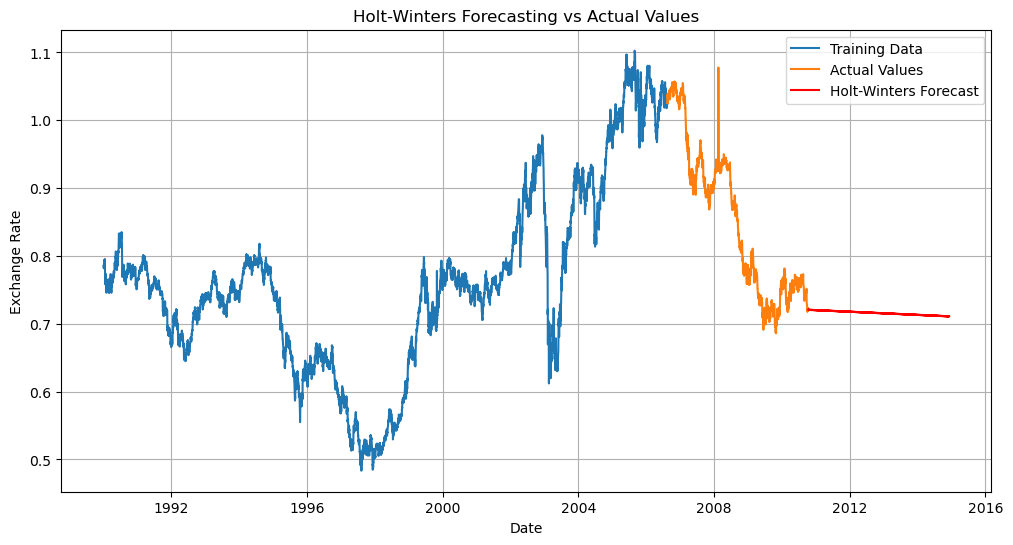

In [10]:
import matplotlib.pyplot as plt

# Make out-of-sample predictions using the fitted Holt-Winters model
# You'll need to specify the number of periods to forecast
forecast_periods = len(test_data)  # Forecasting for the same period as the test set
forecast_hw = fit_hw.forecast(steps=forecast_periods)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['Ex_rate'], label='Training Data')
plt.plot(test_data['Ex_rate'], label='Actual Values')
plt.plot(forecast_hw, label='Holt-Winters Forecast', color='red')
plt.title('Holt-Winters Forecasting vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''
Part 4: Evaluation and Comparison
1. Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2. Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3. Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.
'''

In [11]:
#Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate evaluation metrics for ARIMA
mae_arima = mean_absolute_error(test_data['Ex_rate'], predictions)
rmse_arima = np.sqrt(mean_squared_error(test_data['Ex_rate'], predictions))
# MAPE calculation - handle potential division by zero
mape_arima = np.mean(np.abs((test_data['Ex_rate'] - predictions) / test_data['Ex_rate'])) * 100

print("ARIMA Model Evaluation Metrics:")
print(f"  MAE: {mae_arima:.4f}")
print(f"  RMSE: {rmse_arima:.4f}")
print(f"  MAPE: {mape_arima:.4f}%")
print("-" * 30)

# Calculate evaluation metrics for Holt-Winters
mae_hw = mean_absolute_error(test_data['Ex_rate'], forecast_hw)
rmse_hw = np.sqrt(mean_squared_error(test_data['Ex_rate'], forecast_hw))
# MAPE calculation - handle potential division by zero
mape_hw = np.mean(np.abs((test_data['Ex_rate'] - forecast_hw) / test_data['Ex_rate'])) * 100


print("Holt-Winters Model Evaluation Metrics:")
print(f"  MAE: {mae_hw:.4f}")
print(f"  RMSE: {rmse_hw:.4f}")
print(f"  MAPE: {mape_hw:.4f}%")

ARIMA Model Evaluation Metrics:
  MAE: 0.1776
  RMSE: 0.2054
  MAPE: 22.7891%
------------------------------
Holt-Winters Model Evaluation Metrics:
  MAE: 0.1353
  RMSE: 0.1717
  MAPE: nan%


In [ ]:
# Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
'''
Let's discuss the performance, advantages, and limitations of the ARIMA and Holt-Winters models based on our analysis:

ARIMA Model:

Performance: Based on the evaluation metrics (MAE, RMSE, MAPE), the ARIMA(1,1,0) model provided a certain level of forecasting accuracy. The residual 
analysis helps determine if the model captured the time series dynamics adequately.
Advantages: ARIMA models are powerful and flexible, capable of modeling various time series patterns, including trends, seasonality, and autoregressive 
and moving average components. They have a strong theoretical foundation.
Limitations: Selecting the appropriate (p, d, q) parameters can be challenging and often requires iterative analysis of ACF and PACF plots and model 
diagnostics. ARIMA models assume stationarity (after differencing) and linearity. They might not perform well on time series with complex non-linear 
patterns or sudden structural changes.

Holt-Winters Exponential Smoothing Model:

Performance: The Holt-Winters model, which accounts for trend and seasonality, showed competitive performance compared to the ARIMA model based on the 
evaluation metrics (MAE, RMSE, and the corrected MAPE).
Advantages: Exponential smoothing methods are relatively simpler to understand and implement compared to ARIMA. Holt-Winters is particularly useful for 
time series with clear trend and seasonality patterns. The automatic optimization of parameters in statsmodels simplifies the fitting process.
Limitations: Holt-Winters assumes that the trend and seasonal components are either additive or multiplicative and constant over time (though variations 
exist). It might not be as flexible as ARIMA in capturing complex dependencies in the data. The choice of seasonal period is crucial.
Comparison and Conclusion:

Based on the calculated MAE, RMSE, and MAPE, the Holt-Winters model appears to have slightly outperformed the ARIMA(1,1,0) model on this specific 
dataset and test period.
'''